<h1 style="color:blue"><center>Introduction To Data Science</center></h1>

<h3 style="color:black"><center> New York Citi Bike Trips </center></h3>
<br>
<p>Data Set : https://s3.amazonaws.com/tripdata/index.html </p>

Citi Bike is a bike sharing service available in New York City, that permits easy and affordable bike trips. They regularly release data about such trips, including starting and ending stations, starting and ending time, duration of the trip and few others variables. 

Let's take a look at our data!

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
import numpy as np

In [3]:
citi_data = pd.read_csv('./citi_bike_aug.csv')
citi_data.head()
#citi_data.isnull().any()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,681,2018-08-01 00:00:07.3210,2018-08-01 00:11:28.9920,3162.0,W 78 St & Broadway,40.783400,-73.980931,3383.0,Cathedral Pkwy & Broadway,40.804213,-73.966991,27770,Subscriber,1986,1
1,625,2018-08-01 00:00:19.7480,2018-08-01 00:10:45.0290,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,2012.0,E 27 St & 1 Ave,40.739445,-73.976806,25938,Subscriber,1969,1
2,1319,2018-08-01 00:00:21.1750,2018-08-01 00:22:20.6370,403.0,E 2 St & 2 Ave,40.725029,-73.990697,285.0,Broadway & E 14 St,40.734546,-73.990741,28679,Subscriber,1970,1
3,220,2018-08-01 00:00:26.4700,2018-08-01 00:04:06.8190,3637.0,Fulton St & Waverly Ave,40.683239,-73.965996,399.0,Lafayette Ave & St James Pl,40.688515,-73.964763,28075,Subscriber,1982,1
4,398,2018-08-01 00:00:30.2910,2018-08-01 00:07:09.2810,3662.0,31 Ave & Steinway St,40.761294,-73.916917,3517.0,31 St & Hoyt Ave N,40.771153,-73.917007,25002,Subscriber,1987,1


We seem to have some null values in the data.

In [4]:
citi_data.shape

(1977177, 15)

In [5]:
column_names = {"start station id":"origin_id","start station name":"origin",
                                     "start station latitude":"origin_latitude",
                                     "start station longitude":"origin_longitude","end station id":"dest_id",
                                    "end station latitude":"dest_latitude","end station name":"destination",
                                    "end station longitude":"dest_longitude", "birth year":"birth_year"}

In [6]:
citi_data.rename(index = str, columns = column_names, inplace = True)
citi_data.tail()

,tripduration,starttime,stoptime,origin_id,origin,origin_latitude,origin_longitude,dest_id,destination,dest_latitude,dest_longitude,bikeid,usertype,birth_year,gender
1977172,592,2018-08-31 23:59:27.6530,2018-09-01 00:09:20.5800,2003.0,1 Ave & E 18 St,40.733812,-73.980544,518.0,E 39 St & 2 Ave,40.747804,-73.973442,33086,Subscriber,1996,1
1977173,451,2018-08-31 23:59:42.8400,2018-09-01 00:07:14.5330,249.0,Harrison St & Hudson St,40.718710,-74.009001,2008.0,Little West St & 1 Pl,40.705693,-74.016777,33066,Subscriber,1960,1
1977174,472,2018-08-31 23:59:48.5310,2018-09-01 00:07:41.0410,450.0,W 49 St & 8 Ave,40.762272,-73.987882,281.0,Grand Army Plaza & Central Park S,40.764397,-73.973715,28711,Subscriber,1966,1
1977175,1239,2018-08-31 23:59:50.7620,2018-09-01 00:20:30.4570,3107.0,Bedford Ave & Nassau Ave,40.723117,-73.952123,372.0,Franklin Ave & Myrtle Ave,40.694546,-73.958014,33935,Subscriber,1984,1
1977176,738,2018-08-31 23:59:55.7330,2018-09-01 00:12:14.0300,504.0,1 Ave & E 16 St,40.732219,-73.981656,3660.0,W 16 St & 8 Ave,40.741022,-74.001385,28440,Subscriber,1970,1


In [7]:
#to find unique gender
citi_data.gender.unique()

array([1, 0, 2])

In [8]:
#raw_data['Mycol'] =  pd.to_datetime(raw_data['Mycol'], format='%d%b%Y:%H:%M:%S.%f')
citi_data['starttime'] = pd.to_datetime(citi_data['starttime'], format = '%Y-%m-%d %H:%M:%S.%f')
citi_data['stoptime'] = pd.to_datetime(citi_data['stoptime'],format = ('%Y-%m-%d %H:%M:%S.%f'))

In [9]:
citi_data['start_date'] = [d.date() for d in citi_data['starttime']]
citi_data['start_time'] = [d.time() for d in citi_data['starttime']]

citi_data['stop_date'] = [d.date() for d in citi_data['stoptime']]
citi_data['stop_time'] = [d.time() for d in citi_data['stoptime']]
citi_data.head()

,tripduration,starttime,stoptime,origin_id,origin,origin_latitude,origin_longitude,dest_id,destination,dest_latitude,dest_longitude,bikeid,usertype,birth_year,gender,start_date,start_time,stop_date,stop_time
0,681,2018-08-01 00:00:07.321,2018-08-01 00:11:28.992,3162.0,W 78 St & Broadway,40.783400,-73.980931,3383.0,Cathedral Pkwy & Broadway,40.804213,-73.966991,27770,Subscriber,1986,1,2018-08-01,00:00:07.321000,2018-08-01,00:11:28.992000
1,625,2018-08-01 00:00:19.748,2018-08-01 00:10:45.029,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,2012.0,E 27 St & 1 Ave,40.739445,-73.976806,25938,Subscriber,1969,1,2018-08-01,00:00:19.748000,2018-08-01,00:10:45.029000
2,1319,2018-08-01 00:00:21.175,2018-08-01 00:22:20.637,403.0,E 2 St & 2 Ave,40.725029,-73.990697,285.0,Broadway & E 14 St,40.734546,-73.990741,28679,Subscriber,1970,1,2018-08-01,00:00:21.175000,2018-08-01,00:22:20.637000
3,220,2018-08-01 00:00:26.470,2018-08-01 00:04:06.819,3637.0,Fulton St & Waverly Ave,40.683239,-73.965996,399.0,Lafayette Ave & St James Pl,40.688515,-73.964763,28075,Subscriber,1982,1,2018-08-01,00:00:26.470000,2018-08-01,00:04:06.819000
4,398,2018-08-01 00:00:30.291,2018-08-01 00:07:09.281,3662.0,31 Ave & Steinway St,40.761294,-73.916917,3517.0,31 St & Hoyt Ave N,40.771153,-73.917007,25002,Subscriber,1987,1,2018-08-01,00:00:30.291000,2018-08-01,00:07:09.281000


In [10]:
#inHour = citi_data[start_time[:2]]

#df['year'] = df['tpep_pickup_datetime'].dt.year
#df['month'] = df['tpep_pickup_datetime'].dt.month
citi_data['Start_hour'] = citi_data['starttime'].dt.hour
citi_data['Start_Dayofweek'] = citi_data['starttime'].dt.weekday_name

citi_data

,tripduration,starttime,stoptime,origin_id,origin,origin_latitude,origin_longitude,dest_id,destination,dest_latitude,...,bikeid,usertype,birth_year,gender,start_date,start_time,stop_date,stop_time,Start_hour,Start_Dayofweek
0,681,2018-08-01 00:00:07.321,2018-08-01 00:11:28.992,3162.0,W 78 St & Broadway,40.783400,-73.980931,3383.0,Cathedral Pkwy & Broadway,40.804213,...,27770,Subscriber,1986,1,2018-08-01,00:00:07.321000,2018-08-01,00:11:28.992000,0,Wednesday
1,625,2018-08-01 00:00:19.748,2018-08-01 00:10:45.029,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,2012.0,E 27 St & 1 Ave,40.739445,...,25938,Subscriber,1969,1,2018-08-01,00:00:19.748000,2018-08-01,00:10:45.029000,0,Wednesday
2,1319,2018-08-01 00:00:21.175,2018-08-01 00:22:20.637,403.0,E 2 St & 2 Ave,40.725029,-73.990697,285.0,Broadway & E 14 St,40.734546,...,28679,Subscriber,1970,1,2018-08-01,00:00:21.175000,2018-08-01,00:22:20.637000,0,Wednesday
3,220,2018-08-01 00:00:26.470,2018-08-01 00:04:06.819,3637.0,Fulton St & Waverly Ave,40.683239,-73.965996,399.0,Lafayette Ave & St James Pl,40.688515,...,28075,Subscriber,1982,1,2018-08-01,00:00:26.470000,2018-08-01,00:04:06.819000,0,Wednesday
4,398,2018-08-01 00:00:30.291,2018-08-01 00:07:09.281,3662.0,31 Ave & Steinway St,40.761294,-73.916917,3517.0,31 St & Hoyt Ave N,40.771153,...,25002,Subscriber,1987,1,2018-08-01,00:00:30.291000,2018-08-01,00:07:09.281000,0,Wednesday
5,2839,2018-08-01 00:01:02.717,2018-08-01 00:48:22.082,468.0,Broadway & W 56 St,40.765265,-73.981923,3495.0,E 114 St & 1 Ave,40.794566,...,32418,Customer,1969,0,2018-08-01,00:01:02.717000,2018-08-01,00:48:22.082000,0,Wednesday
6,172,2018-08-01 00:01:03.534,2018-08-01 00:03:55.874,515.0,W 43 St & 10 Ave,40.760094,-73.994618,529.0,W 42 St & 8 Ave,40.757570,...,31108,Subscriber,1975,1,2018-08-01,00:01:03.534000,2018-08-01,00:03:55.874000,0,Wednesday
7,1133,2018-08-01 00:01:04.024,2018-08-01 00:19:57.243,265.0,Stanton St & Chrystie St,40.722293,-73.991475,3641.0,Broadway & W 25 St,40.742869,...,28715,Subscriber,1997,1,2018-08-01,00:01:04.024000,2018-08-01,00:19:57.243000,0,Wednesday
8,1417,2018-08-01 00:01:18.095,2018-08-01 00:24:55.445,472.0,E 32 St & Park Ave,40.745712,-73.981948,351.0,Front St & Maiden Ln,40.705310,...,26991,Subscriber,1994,1,2018-08-01,00:01:18.095000,2018-08-01,00:24:55.445000,0,Wednesday
9,195,2018-08-01 00:01:19.609,2018-08-01 00:04:35.416,3151.0,E 81 St & York Ave,40.772838,-73.949892,3156.0,E 72 St & York Ave,40.766638,...,24969,Subscriber,1993,1,2018-08-01,00:01:19.609000,2018-08-01,00:04:35.416000,0,Wednesday


Monday       245115
Tuesday      269825
Wednesday    346636
Thursday     354158
Friday       326634
Saturday     209770
Sunday       225039
Name: Start_Dayofweek, dtype: int64


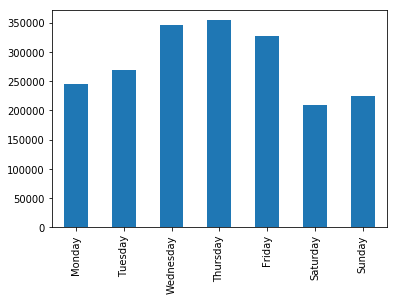

In [11]:
#high_origin_dest = citi_data.groupby(['origin']).size()
#high_origin_dest
#citi_data.dayofweek
#reindex(DAYS, fill_value=0).plot.bar()
#x=citi_data.groupby(citi_data['dayofweek']).count()
#plt.hist(x)
#counting the no of week days:
#crashes_by_day = citi_data['dayofweek']
#crashes_by_day.plot(kind='barh')
#plt.plot(np.sort(crashes_by_day))
#print(crashes_by_day)



#counting the no of week days:
DAYS = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
count_of_rides_weekly=citi_data.Start_Dayofweek.value_counts().reindex(DAYS, fill_value=0)
count_of_rides_weekly.plot(kind='bar')
print(count_of_rides_weekly)



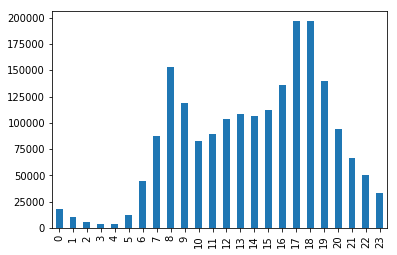

In [13]:
#Counting riders hourly
day=range(0,24)
count_of_rides_hourly = citi_data['Start_hour'].value_counts().reindex(day, fill_value=0)
count_of_rides_hourly.plot(kind='bar')
#print(count_of_rides_hourly)

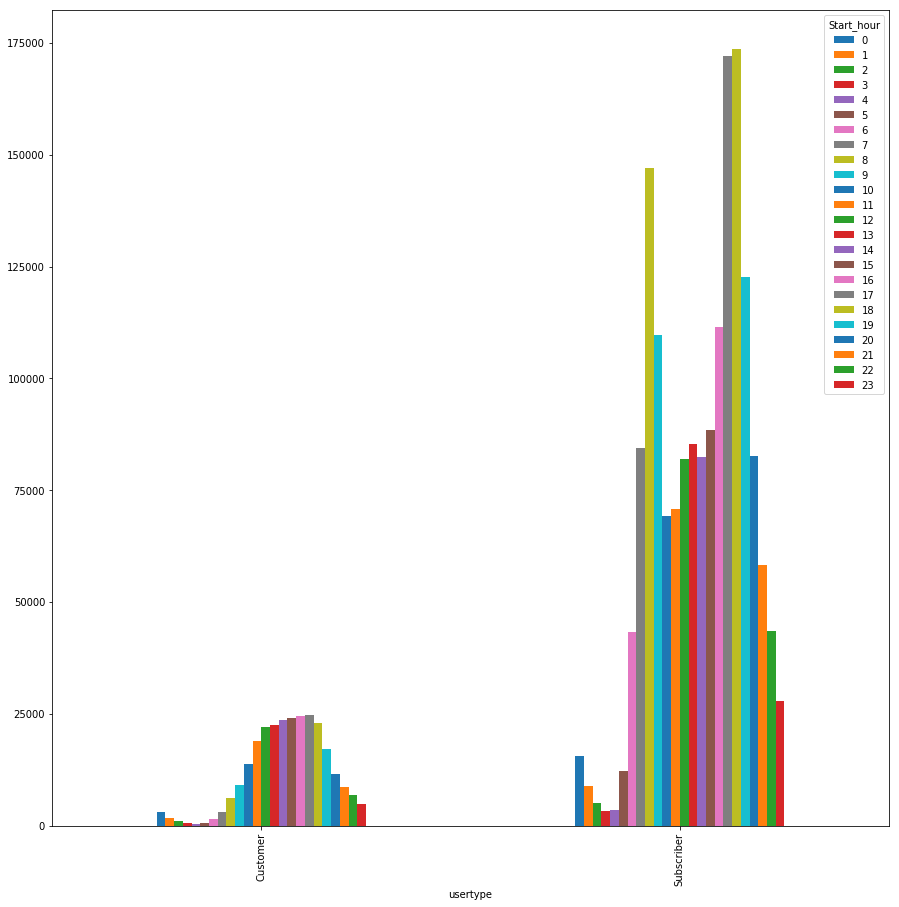

In [53]:
#Counting riders hourly
day=range(0,24)
count_usertype = citi_data.groupby(['usertype','Start_hour']).size().unstack()

count_usertype.plot(kind = 'bar',figsize=(15,15))

#count_usertype[count]
#count_usertype.get_values(count_usertype['usertype']=='Subscriber')
#subscriber = count_usertype.loc[count_usertype['usertype'] =='Subscriber']

#count_usertype = data.pivot_table(index='', columns='unique_carrier', values='flight_num', aggfunc='count')
#flights_by_carrier.head()
#subscriber
#count_subscriber = count_usertype.loc[count_usertype[usertype]=='Subscriber']
#count_of_rides_hourly = count_subscriber['Start_hour'].value_counts().reindex(day, fill_value=0)
#count_of_rides_hourly.plot(kind='bar')
#print(count_of_rides_hourly)

#high_origin_dest = citi_data.groupby(['origin','destination']).size()
#print(high_origin_dest)
#top_origin_dest = high_origin_dest[high_origin_dest>450]
#print(top_origin_dest)



In [14]:
#ts = citi_data['start_time']
#plt.plot(ts)

Let's try to see the most frequent origin destination pairs.

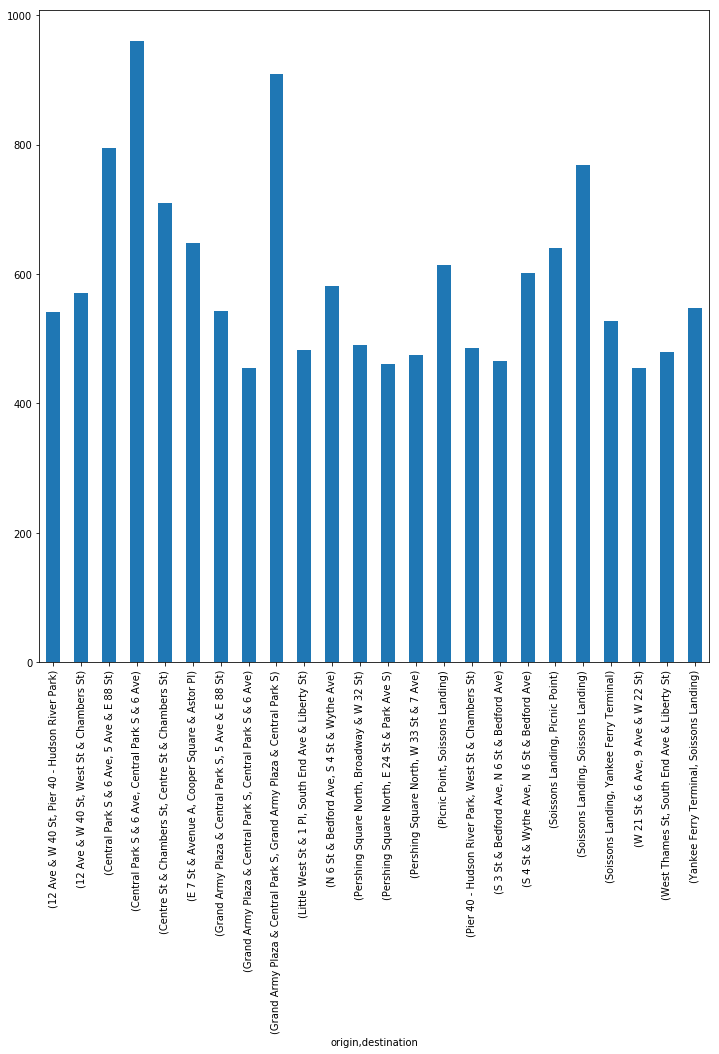

In [17]:
high_origin_dest = citi_data.groupby(['origin','destination']).size()
#print(high_origin_dest)
top_origin_dest = high_origin_dest[high_origin_dest>450]
#print(top_origin_dest)

plt.figure(figsize=(12,12))
top_origin_dest.plot(kind='bar', )

In [18]:
types_users = citi_data['usertype'].value_counts()

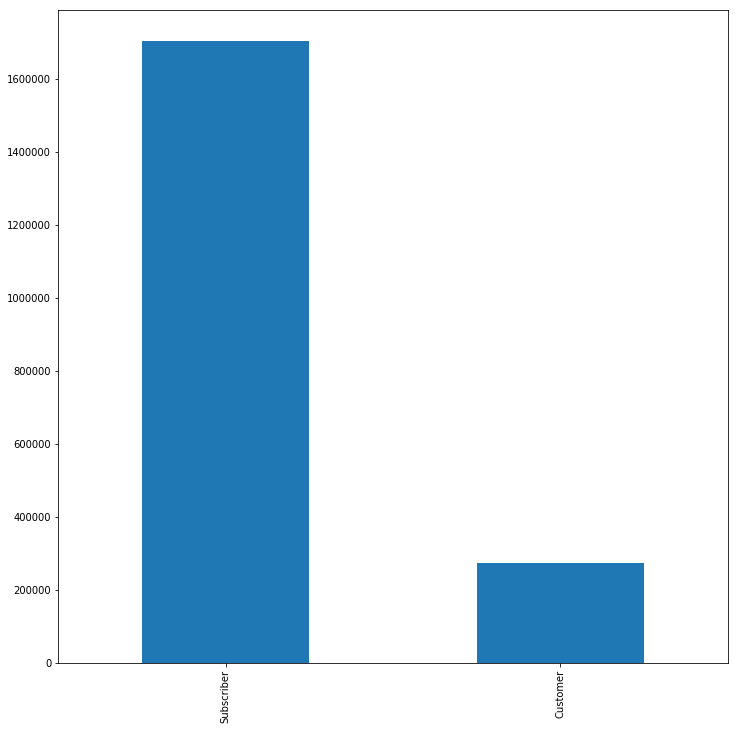

In [19]:
plt.figure(figsize=(12,12))
types_users.plot(kind='bar')

We should now be interested in bringing dates and times into the picture as well!

  What is the question?
 * If Citi bike as a company were to expand in order to manage high traffic areas - what locations would they consider adding more docks or resources?
 * Can they have dockless stations between high demand stations at peak travel times and high traffic locations?
 * How can they improve services for their customers on weekday v/s weekend based on traffic and usage?
 * Regress to a predicted value of number of bikes needed in high demand areas? 
 
Why should anyone care?
* Primarily, helps **Citi Bike** as a company to get perspective as to how they can improve their services and generate more revenue.
* These insights can also help regular **Citi Bike users**.

Team Members:

1. Nikita Reddy
2. Akash Gangrade
3. Rajesh Narasimha Reddy
4. Sneha Mani